# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

In [2]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import gym
from numpy import random


# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [3]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        self.agent=np.array([0,0])
        self.goal=np.array([10,10])
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        #state=self.state_space(state)
        thr=random.rand()
        wall_cells = np.where(self.four_room_space == 1.0)
        self.wall_space = [[col, 10 - row] for row, col in zip(wall_cells[0], wall_cells[1])]
       
        if (act == 'UP'):
            if thr<=0.8:
                poss_state=self.action_space['UP']+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state

             
            elif thr>0.8 and thr <0.9:
                    poss_state=self.action_space['LEFT']+state
                    if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                        next_state=state
                    else:
                        next_state=poss_state

                   
            elif thr>0.9 and thr<1:
                    poss_state=self.action_space['RIGHT']+state   
                    if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                        next_state=state
                    else:
                        next_state=poss_state


        if (act == 'LEFT'):
            
            if thr<=0.8:
                poss_state=self.action_space["LEFT"]+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state
             
            elif thr>0.8 and thr <0.9:
                    poss_state=self.action_space['UP']+state
                    if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                         next_state=state
                    else:
                        next_state=poss_state
                   
            elif thr>0.9 and thr<1:
                    poss_state=self.action_space['RIGHT']+state
                    if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                        next_state=state
                    else:
                        next_state=poss_state

        if (act == 'RIGHT'):
            
            if thr<=0.8:
                poss_state=self.action_space["RIGHT"]+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state
             
            elif thr>0.8 and thr <0.9:
                poss_state=self.action_space['LEFT']+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state
                   
            elif thr>0.9 and thr<1:
                poss_state=self.action_space['UP']+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state
                   
        if (act == 'DOWN'):
            
            if thr<=0.8:
                poss_state=self.action_space["DOWN"]+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state
             
            elif thr>0.8 and thr <0.9:
                poss_state=self.action_space['LEFT']+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state  
            elif thr>0.9 and thr<1:
                poss_state=self.action_space['RIGHT']+state
                if ((poss_state!=self.state_space).all() or (poss_state == self.wall_space).all()):
                    next_state=state
                else:
                    next_state=poss_state  

        if (next_state==self.state_space[9]).all():
            reward=1
        else:
            reward=0
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [4]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [6]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 10
    # create a loop
    for t in range(time_step):
        ac=input('enter action')
        if ac == 'u':
            action='UP'
        elif ac== 'l':
            action='LEFT'
        elif ac=='r':
            action='RIGHT'
        elif ac=='d':
            action='DOWN'

        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
       
        
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state,action)[0],env.step(state,action)[1]
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Step = 0, state = [0, 0], action = LEFT, next state = [-1  0], reward = 0
Step = 1, state = [-1  0], action = UP, next state = [-1  1], reward = 0
Step = 2, state = [-1  1], action = DOWN, next state = [-1  0], reward = 0
Step = 3, state = [-1  0], action = RIGHT, next state = [0 0], reward = 0
Step = 4, state = [0 0], action = LEFT, next state = [1 0], reward = 0
Step = 5, state = [1 0], action = LEFT, next state = [0 0], reward = 0
Step = 6, state = [0 0], action = RIGHT, next state = [1 0], reward = 0
Step = 7, state = [1 0], action = RIGHT, next state = [2 0], reward = 0
Step = 8, state = [2 0], action = LEFT, next state = [1 0], reward = 0
Step = 9, state = [1 0], action = LEFT, next state = [0 0], reward = 0


# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

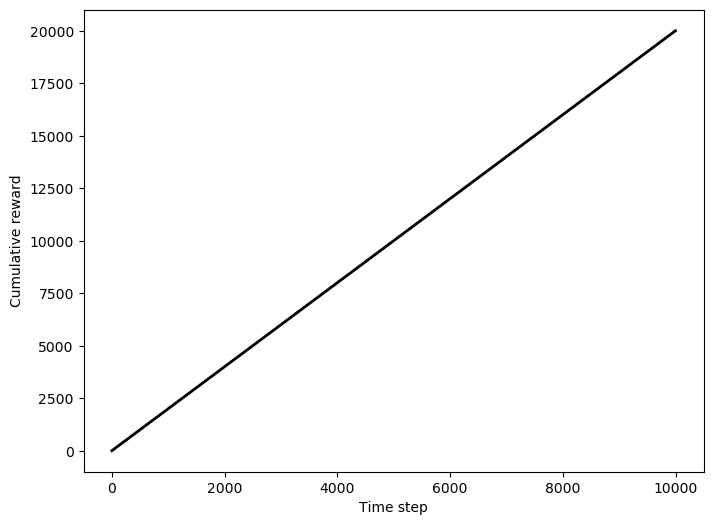

In [11]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list1 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = ['UP','DOWN','RIGHT','LEFT']
            ac=random.choice(action)
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            
            next_state, reward = env.step(state,ac)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter = reward_counter+ reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list1.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list1)

# 4 Implement better & worse policies against the Random Policy

In [1]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list2 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            action = ['UP','LEFT','RIGHT','DOWN']
            ac=random.choice(action)
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            
            next_state, reward = env.step(state,ac)   
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list2.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list2)

NameError: name 'random' is not defined

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

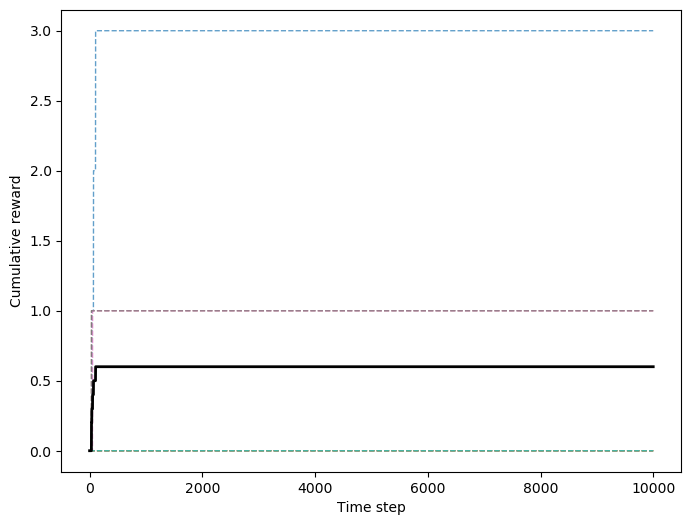

In [29]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list3 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            action = ['UP','LEFT','RIGHT','RIGHT']
            ac=random.choice(action)
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state,ac)  
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list3.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list3)